In [1]:
#import the libraries
import numpy as np #linear algebra
import pandas as pd # data processing and read of dataset
import matplotlib as mpl # data visaulisation
import matplotlib.pyplot as plt
import seaborn as sns #statistical data

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error

#To ignore the warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'C:\Users\Shivan\Downloads\ITSFA Project\sales.csv')

In [3]:
df.head(2)

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,08/11/2017
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,08/11/2017


In [4]:
df2 = df.copy()

In [5]:
df2['Order_Date'] = pd.to_datetime(df2['Order_Date'], format = '%d/%m/%Y')
df2.head(2)

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11-08
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08


In [6]:
df2['Month'] = df2['Order_Date'].dt.to_period('M')
df2.head(2)

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date,Month
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11-08,2017-11
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08,2017-11


In [7]:
monthly_sales = df2.groupby('Month')['Sales'].sum().reset_index()
df2.head(2)

,Unnamed: 0,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Date,Month
0,0,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017-11-08,2017-11
1,1,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017-11-08,2017-11


# Total Sale per Month

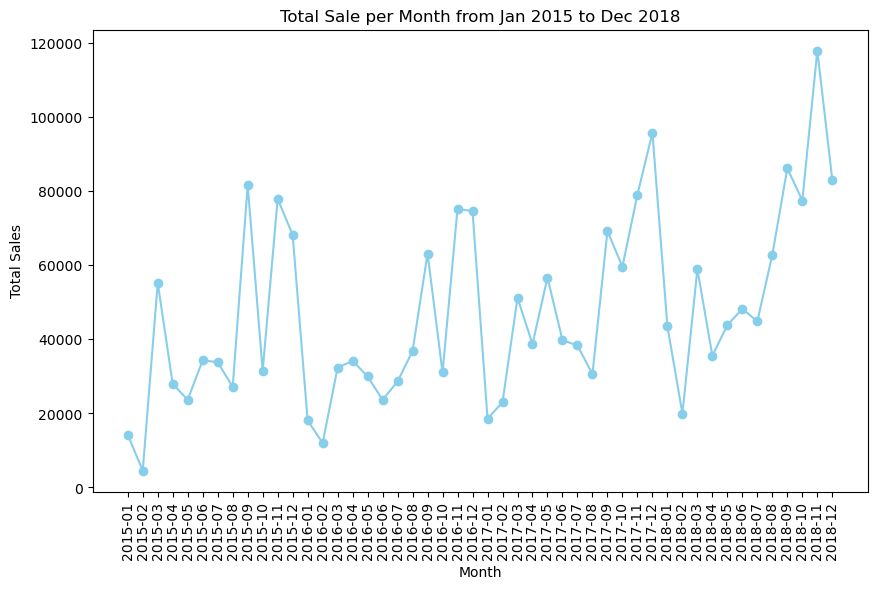

In [9]:
plt.figure(figsize=(10,6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker = 'o', color = 'skyblue') # plot(x,y,marker,color)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sale per Month from Jan 2015 to Dec 2018')
plt.xticks(rotation=90)
plt.show()


In [10]:
category_monthly_sales = df2.groupby(['Month','Category'])['Sales'].sum().reset_index()

In [11]:
category_monthly_sales.head(5)

,Month,Category,Sales
0,2015-01,Furniture,6217.277
1,2015-01,Office Supplies,4845.140
2,2015-01,Technology,3143.290
3,2015-02,Furniture,1839.658
4,2015-02,Office Supplies,1071.724


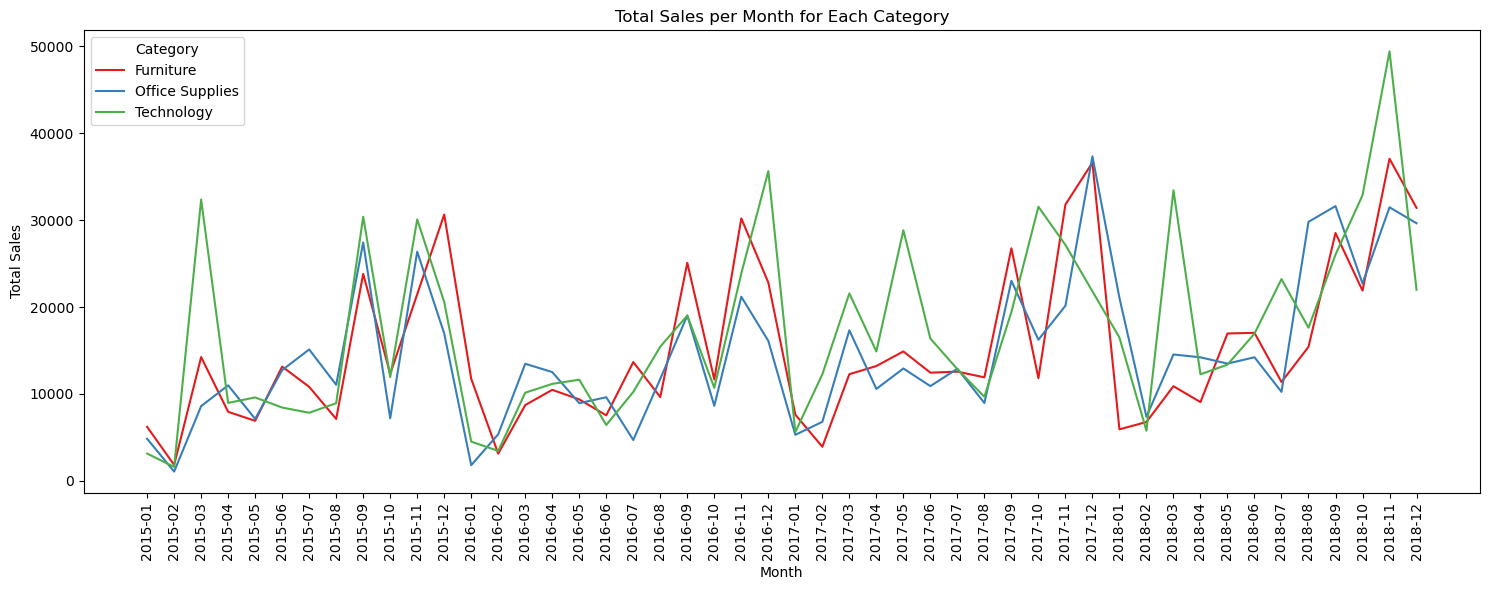

In [12]:
plt.figure(figsize=(15, 6))
sns.lineplot(x=category_monthly_sales['Month'].astype(str), y='Sales', hue='Category', data=category_monthly_sales, palette='Set1') # for sns : plot(x,y,hue,data,color)
plt.title('Total Sales per Month for Each Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Category')
plt.show()


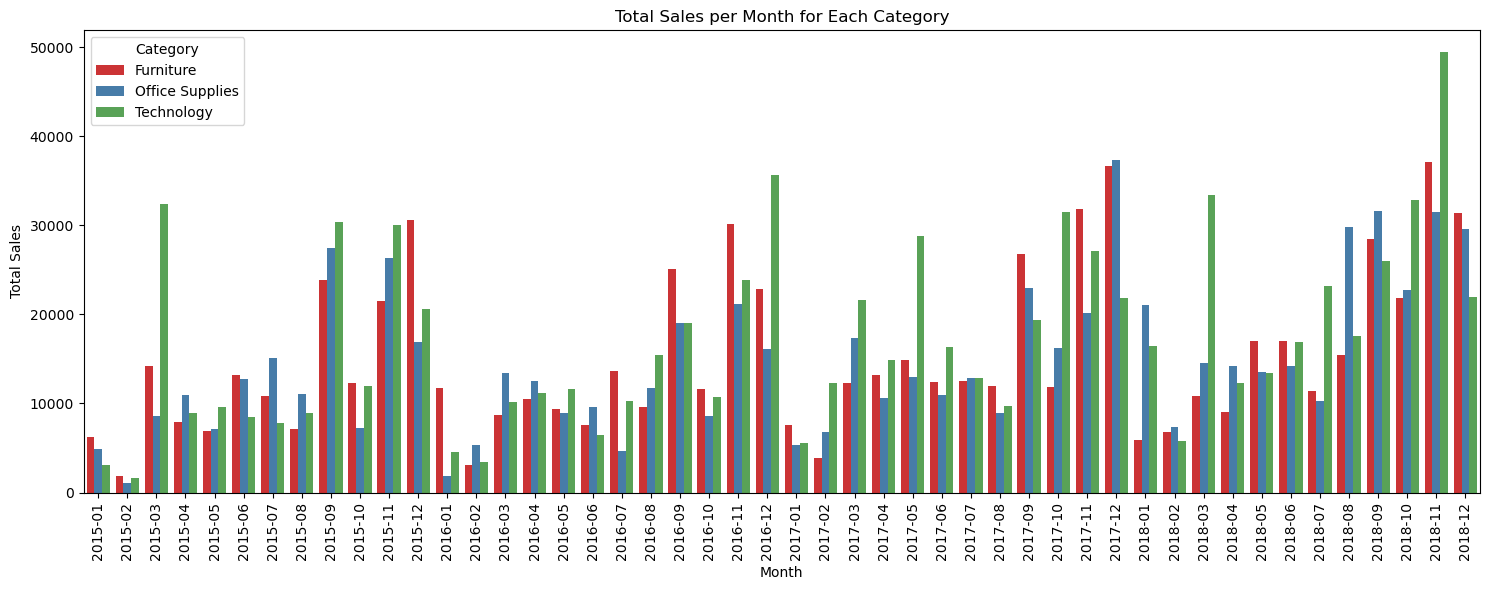

In [13]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='Sales', hue='Category', data=category_monthly_sales, palette='Set1') # for sns : plot(x,y,hue,data,color)
plt.title('Total Sales per Month for Each Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Category')
plt.show()


# Decomposition 

In [15]:
df3 = df.copy()

df3['Order_Date'] = pd.to_datetime(df3['Order_Date'], format='%d/%m/%Y')

# Set the 'Order_Date' column as the index
df3.set_index('Order_Date', inplace=True)

# Resample the data to monthly frequency, assuming 'Sales' column exists
df3 = df3['Sales'].resample('M').sum()
df3.head()

Order_Date
2015-01-31    14205.707
2015-02-28     4519.892
2015-03-31    55205.797
2015-04-30    27906.855
2015-05-31    23644.303
Freq: ME, Name: Sales, dtype: float64

<Axes: title={'center': 'Total Sale per Month from Jan 2015 to Dec 2018'}, xlabel='Order_Date'>

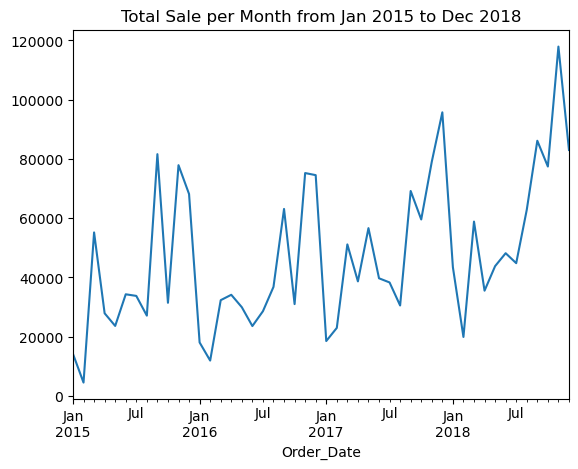

In [16]:
df3.plot(title = "Total Sale per Month from Jan 2015 to Dec 2018")

In [17]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df3, model='additive')

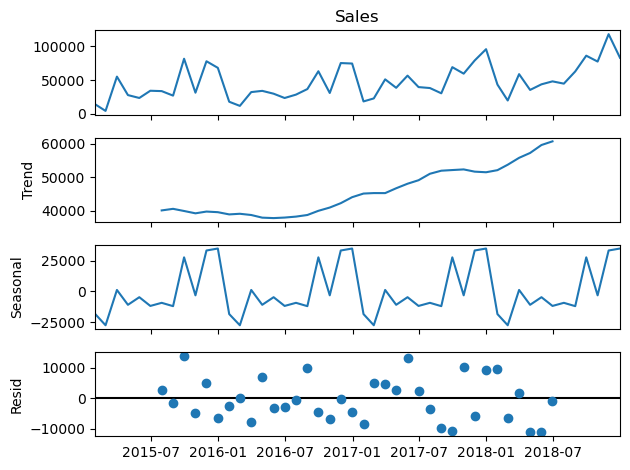

In [18]:
decomposition.plot()
plt.show()

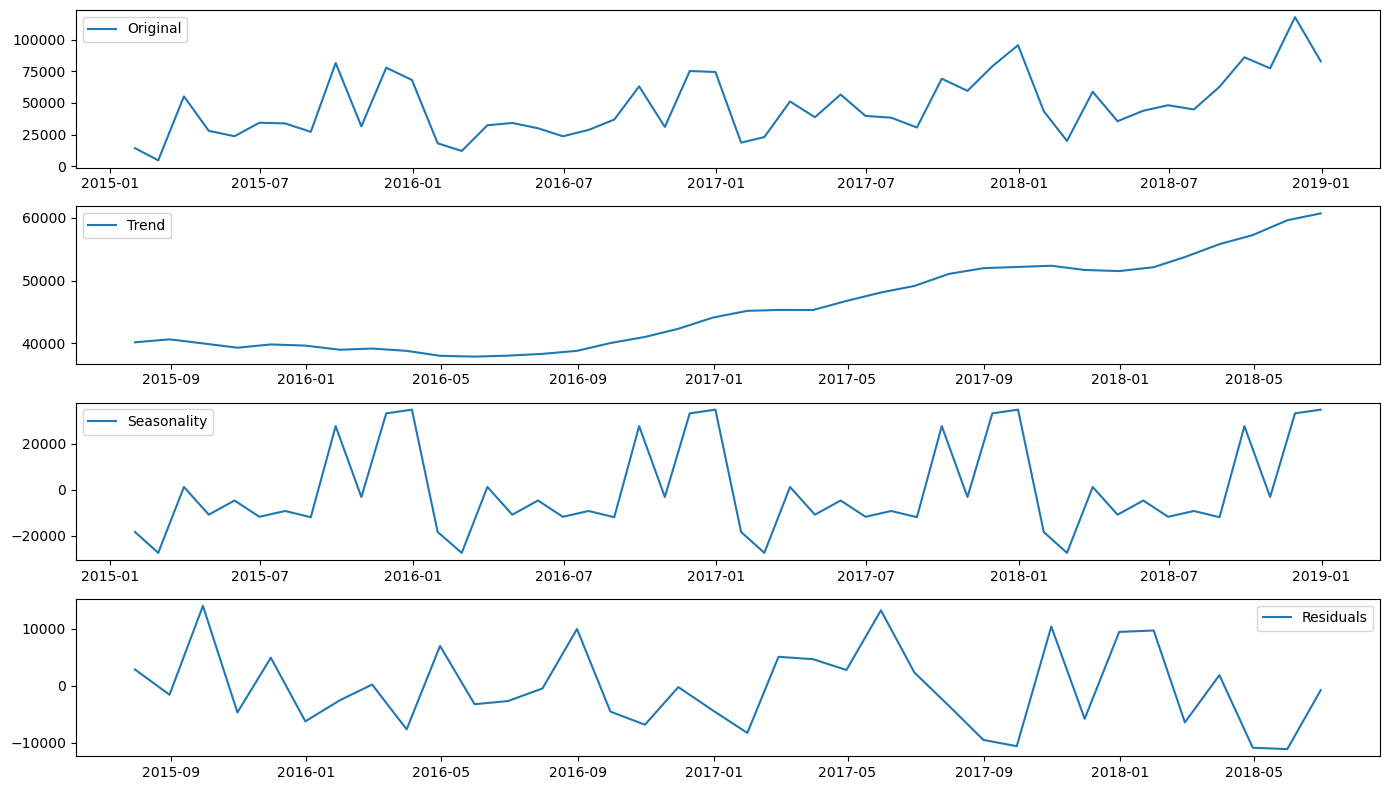

In [19]:
# Plotting the decomposition results
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(df3, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# ACf and PACF

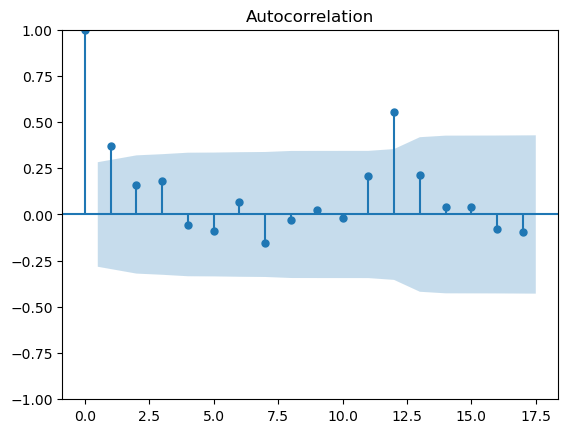

In [21]:
# ACF plot
acf = plot_acf(df3)

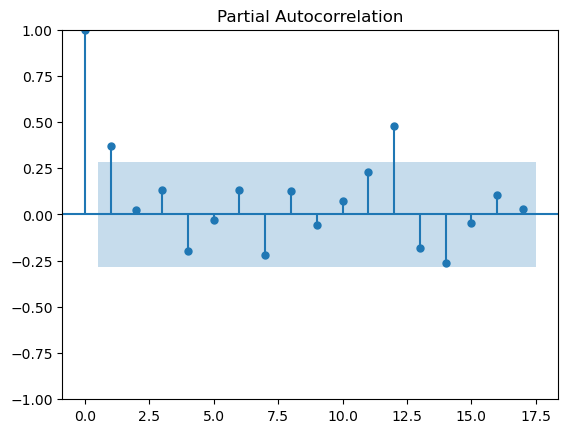

In [22]:
# PACF plot
pacf = plot_pacf(df3)

# ADF Test

Performing the e Augmented Dickey-Fuller test for stationarity 

H0: The time series is non-stationary.

H1: The time series is stationary.


In [25]:
result = adfuller(df3)

adf_statistic = round(result[0],4)
p_value = round(result[1],4)

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')



ADF Statistic: -4.4161
p-value: 0.0003


Since the p-value is  less than alpha=0.05, we reject the null hypothesis. 

This means the time series is stationary.


# Holt Winters Exponential Smoothng

In [28]:
HWES_model = ExponentialSmoothing(df3,
                                trend = "add",
                                seasonal='additive', 
                                seasonal_periods=12).fit()

HWES_model_fitted = HWES_model.fittedvalues


## plotting Actual (Monthly Sales, i.e df3) and predicted (HWES) models

<function matplotlib.pyplot.show(close=None, block=None)>

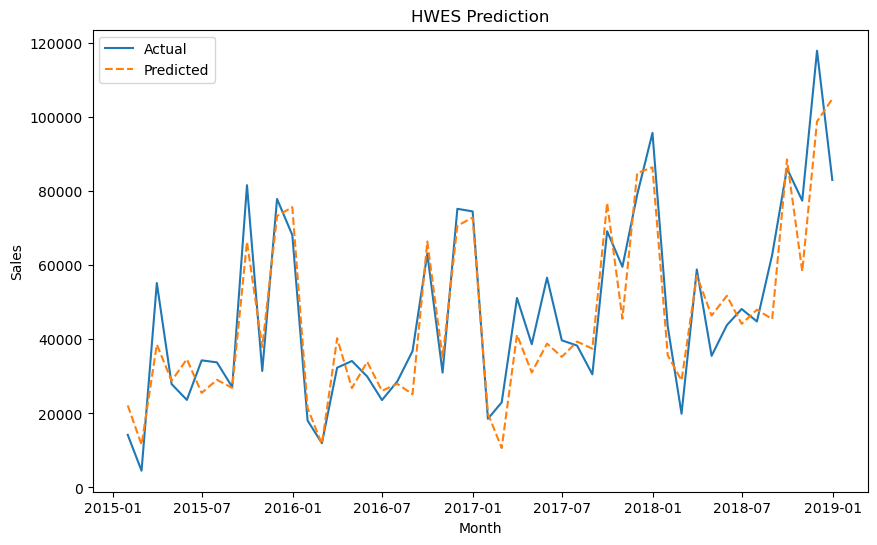

In [30]:
plt.figure(figsize=(10,6))
plt.plot(df3, label = "Actual")
plt.plot(HWES_model_fitted, label = "Predicted", linestyle = "--")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("HWES Prediction")
plt.legend()
plt.show

## performance metrics for the HWES model

In [32]:
mse = round(mean_squared_error(df3, HWES_model_fitted),2)
rmse = round(root_mean_squared_error(df3, HWES_model_fitted),2)
mae = round(mean_absolute_error(df3, HWES_model_fitted),2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 88298141.49
Root Mean Squared Error (RMSE): 9396.71
Mean Absolute Error (MAE): 7601.39


## Forecast sales for the next 12 months

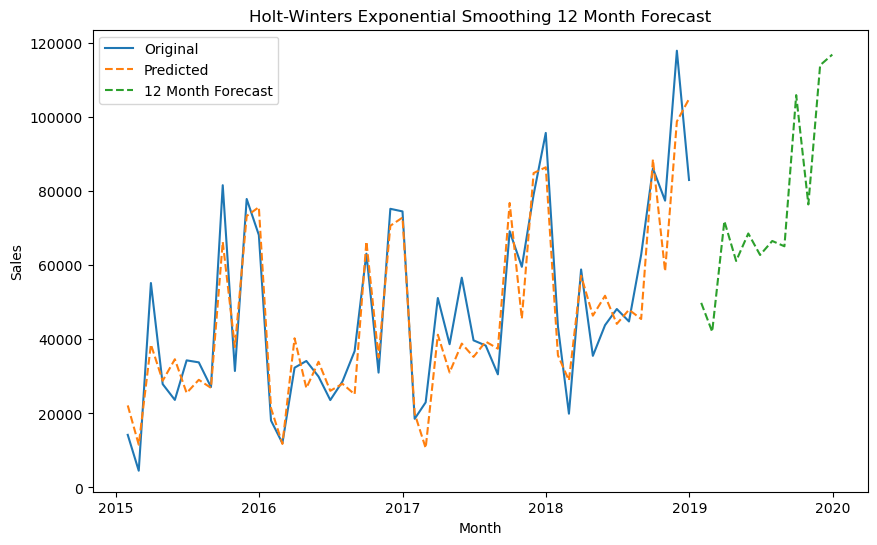

In [34]:
forecast_12_months = HWES_model.forecast(steps=12)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df3, label='Original')
plt.plot(HWES_model_fitted, label = "Predicted", linestyle = "--")
plt.plot(forecast_12_months, label = "12 Month Forecast", linestyle = "--")
plt.title('Holt-Winters Exponential Smoothing 12 Month Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# AR and MA models

In [36]:
from statsmodels.tsa.arima_process import ArmaProcess

PACF plot - order of AR ; tells you the correlation between the esires and it's lag

ACF - order of MA; how many terms are required to remove any autocorrelation in the stationarised series

different lengths for df3 (43 rows) and ar_model_fitted (36). So you can assess the model performance

NOTE: 
AR(1) and ARIMA(1,0,0) will be slightly different form each other.

USE AutoReg 


AutoReg estimates parameters using OLS which is conditional (on the first observation) maximum likelihood. ARIMA implements full maximum likelihood and so uses the available information in the first observation when estimating parameters. In very large samples, the coefficients should be very close, and they are equal in their asymptotic limit. IN practice, they will always differ, although the difference should usually be minor.

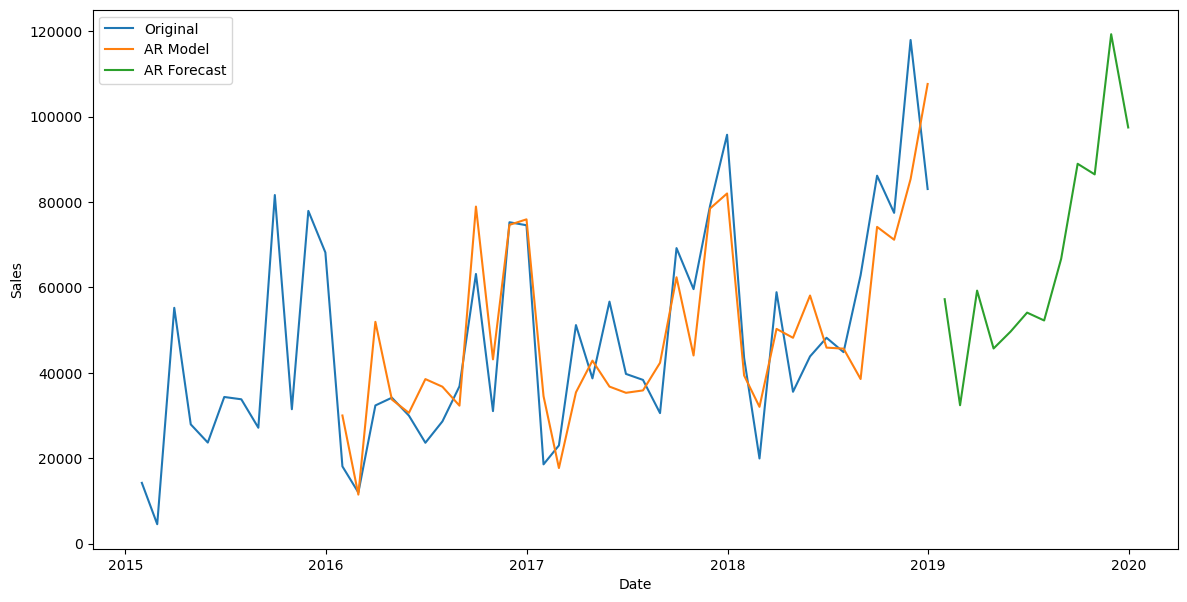

In [51]:
ar_model2 = AutoReg(df3, lags=[1,12]).fit()
ar_model_fitted2 = ar_model2.fittedvalues

ar_forecast_12_months2 = ar_model2.forecast(steps=12)

plt.figure(figsize=(14, 7))
plt.plot(df3, label='Original')
plt.plot(ar_model_fitted2, label='AR Model')
plt.plot(ar_forecast_12_months2, label='AR Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

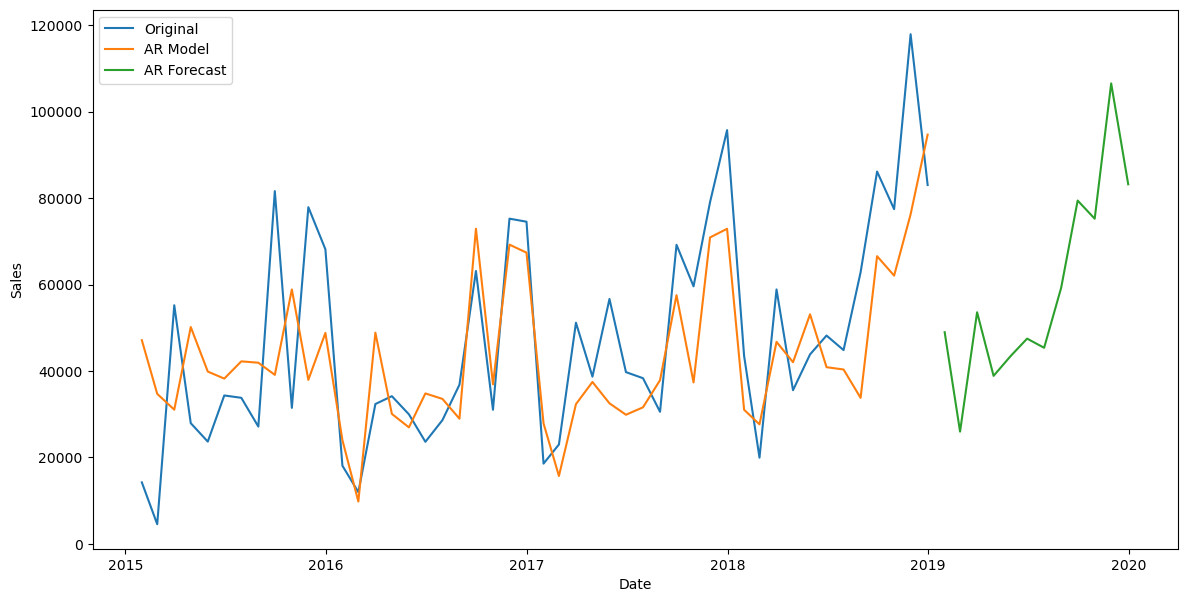

In [53]:
ar_model = ARIMA(df3, order=([1,12], 0, 0)).fit()
ar_fitted = ar_model.fittedvalues

ar_forecast_12_months = ar_model.forecast(steps=12)

plt.figure(figsize=(14, 7))
plt.plot(df3, label='Original')
plt.plot(ar_fitted, label='AR Model')
plt.plot(ar_forecast_12_months, label='AR Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [55]:
mse = round(mean_squared_error(df3, ar_fitted),2)
rmse = round(root_mean_squared_error(df3, ar_fitted),2)
mae = round(mean_absolute_error(df3, ar_fitted),2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 319595396.65
Root Mean Squared Error (RMSE): 17877.23
Mean Absolute Error (MAE): 14451.01


# MA model

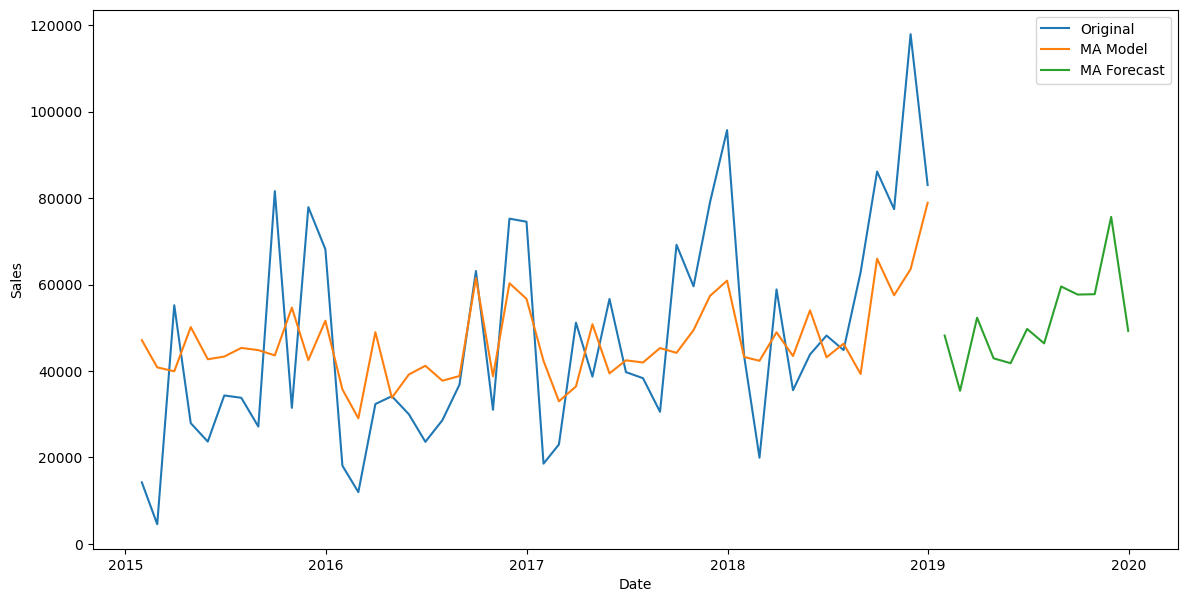

In [60]:
ma_model = ARIMA(df3, order=(0, 0, [1,12])).fit()
ma_fitted = ma_model.fittedvalues

ma_forecast_12_months = ma_model.forecast(steps=12)

plt.figure(figsize=(14, 7))
plt.plot(df3, label='Original')
plt.plot(ma_fitted, label='MA Model')
plt.plot(ma_forecast_12_months, label='MA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [61]:
mse = round(mean_squared_error(df3, ma_fitted),2)
rmse = round(root_mean_squared_error(df3, ma_fitted),2)
mae = round(mean_absolute_error(df3, ma_fitted),2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 387595628.06
Root Mean Squared Error (RMSE): 19687.45
Mean Absolute Error (MAE): 16231.75


# ARIMA model

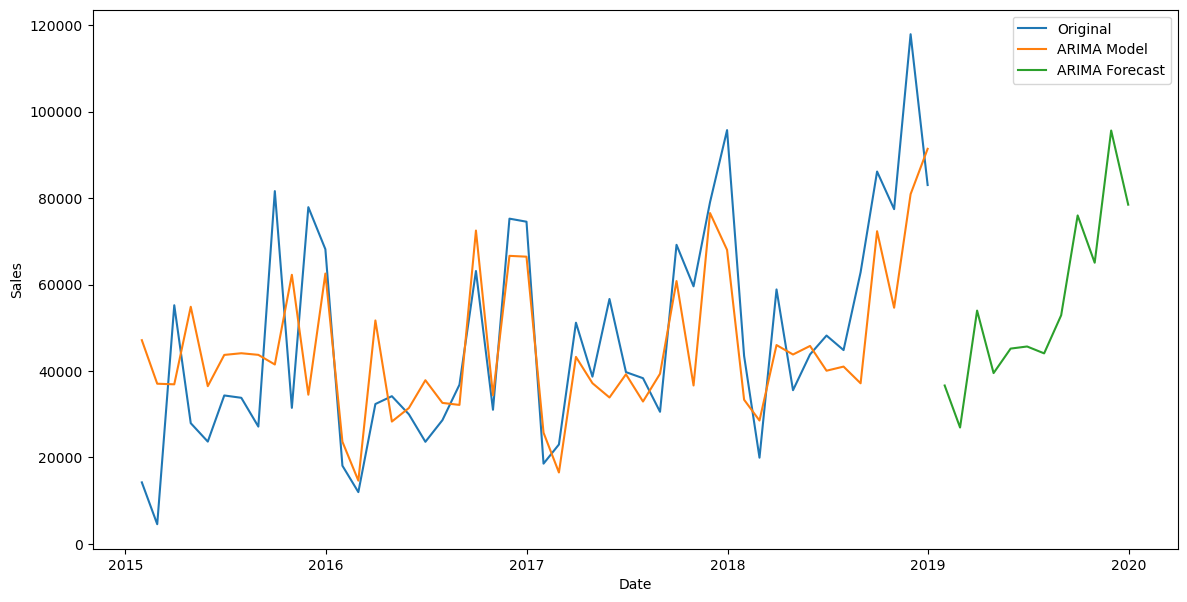

In [65]:
arima_model = ARIMA(df3, order=([1,12], 0, [1,12])).fit()
arima_fitted = arima_model.fittedvalues
arima_model_forecast_12_months = arima_model.forecast(steps=12)
plt.figure(figsize=(14, 7))
plt.plot(df3, label='Original')
plt.plot(arima_fitted, label='ARIMA Model')
plt.plot(arima_model_forecast_12_months, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [66]:
mse = round(mean_squared_error(df3, arima_fitted),2)
rmse = round(root_mean_squared_error(df3, arima_fitted),2)
mae = round(mean_absolute_error(df3, arima_fitted),2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 306360185.14
Root Mean Squared Error (RMSE): 17503.15
Mean Absolute Error (MAE): 13556.22


# SARIMA model

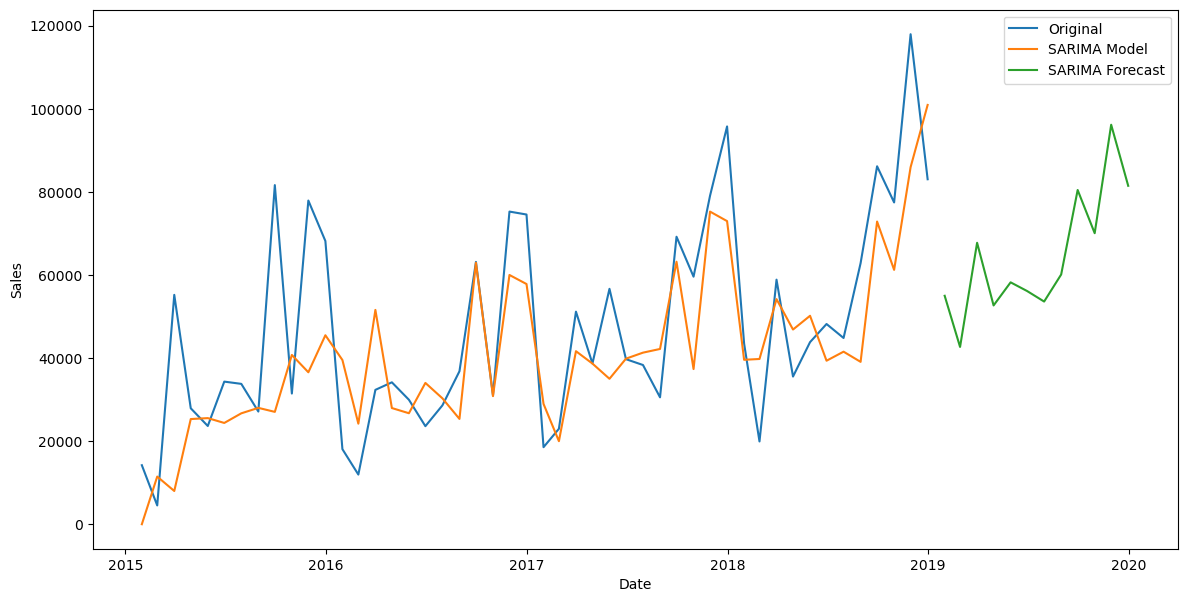

In [70]:
sarima_model = SARIMAX(df3, order=([1], 0, [1]), seasonal_order = ([1], 0, [1], 12)).fit()
sarima_fitted = sarima_model.fittedvalues

sarima_model_forecast_12_months = sarima_model.forecast(steps=12)

plt.figure(figsize=(14, 7))
plt.plot(df3, label='Original')
plt.plot(sarima_fitted, label='SARIMA Model')
plt.plot(sarima_model_forecast_12_months, label='SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [71]:
mse = round(mean_squared_error(df3, sarima_fitted),2)
rmse = round(root_mean_squared_error(df3, sarima_fitted),2)
mae = round(mean_absolute_error(df3, sarima_fitted),2)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 304892173.94
Root Mean Squared Error (RMSE): 17461.16
Mean Absolute Error (MAE): 12761.9


# Eg. with non stationary data

In [75]:
data = pd.read_csv('jj.csv')

In [76]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


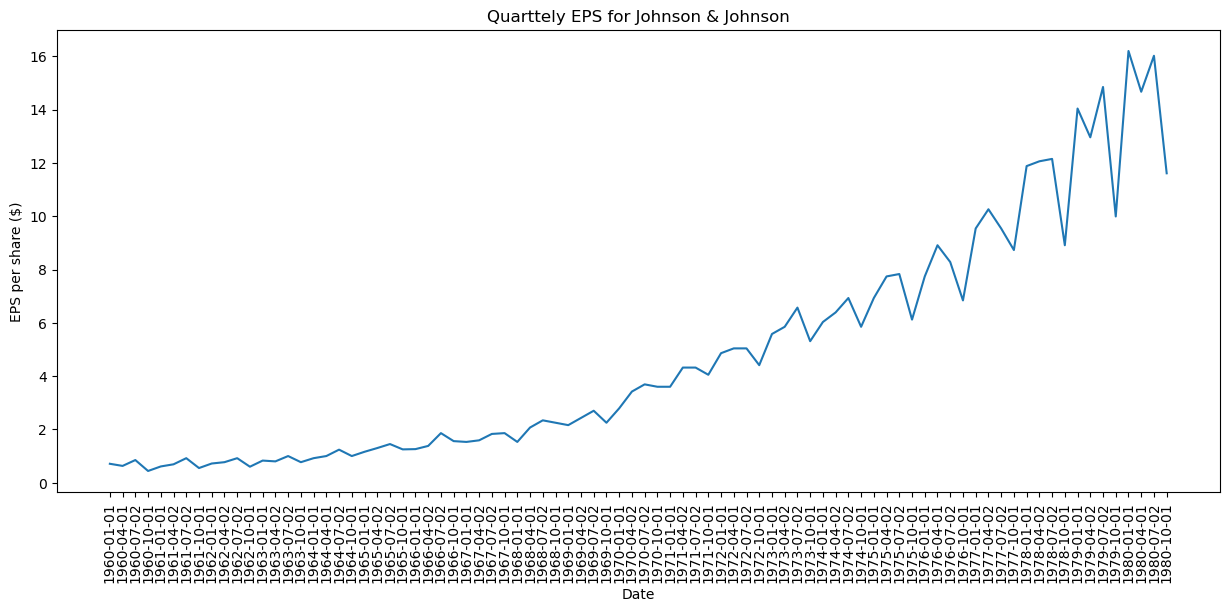

In [77]:
plt.figure(figsize= (15,6))
plt.plot(data['date'], data['data'])
plt.title("Quarttely EPS for Johnson & Johnson")
plt.ylabel('EPS per share ($)')
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.show()


In [80]:
# ADF test for stationarity

result = adfuller(data['data'])

adf_statistic = round(result[0],4)
p_value = round(result[1],4)

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')


ADF Statistic: 2.742
p-value: 1.0


 ADF test for stationarity
 
H0: The time series is non-stationary.

H1: The time series is stationary.

Since the p-value is  greater than alpha=0.05, we fail reject the null hypothesis. 

This means the time series is non-stationary. Hence we have to make the series stationary

## Using Log differnce to make data stationary

In [85]:
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data.head(5)


,date,data
0,1960-01-01,NaN
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684


In [87]:
data = data.drop(data.index[0]) # row @ index 0 was became null
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


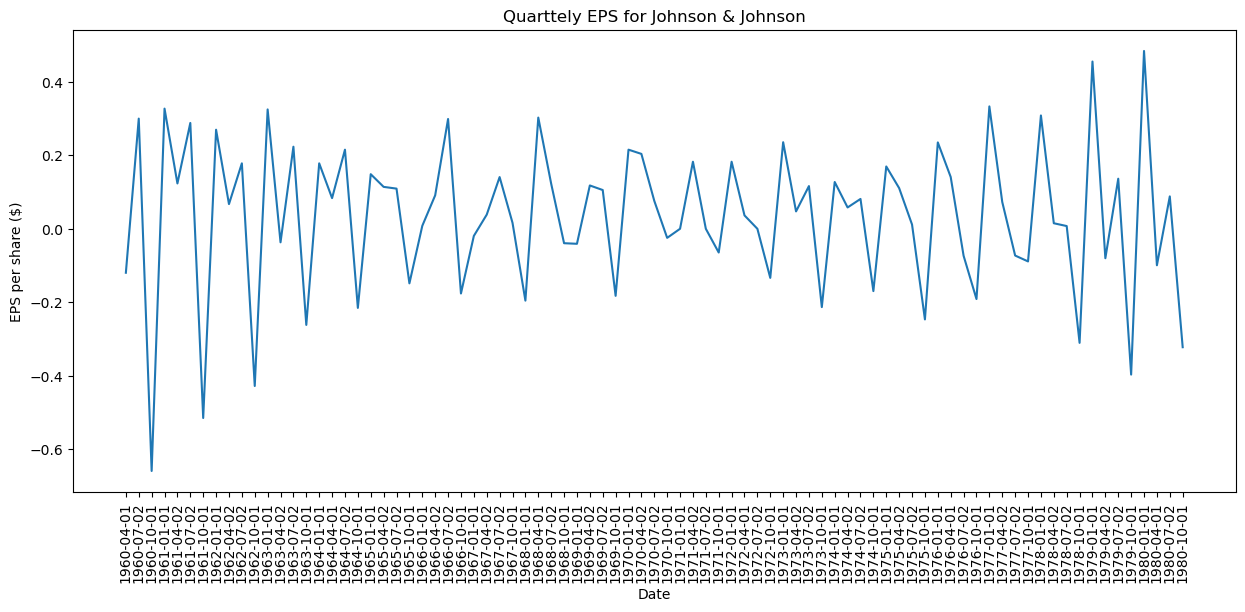

In [89]:
plt.figure(figsize= (15,6))
plt.plot(data['date'], data['data'])
plt.title("Quarttely EPS for Johnson & Johnson")
plt.ylabel('EPS per share ($)')
plt.xlabel("Date")
plt.xticks(rotation = 90)
plt.show()

In [90]:
# ADF test for stationarity

result = adfuller(data['data'])

adf_statistic = round(result[0],4)
p_value = round(result[1],4)

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

ADF Statistic: -4.317
p-value: 0.0004


data is stationary

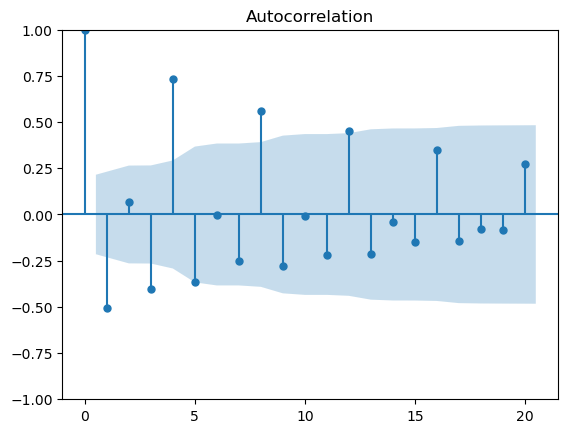

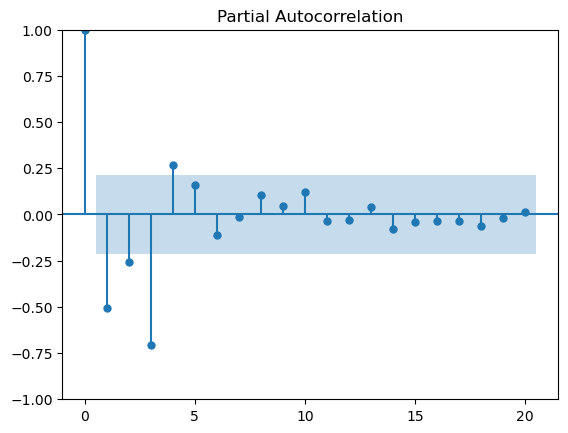

In [94]:
acf = plot_acf(data['data'])
pacf = plot_pacf(data['data'])